In [29]:
import sys
import os
from pathlib import Path

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE_DIR = Path(os.getcwd()).resolve().parents[0]
sys.path.append(str(BASE_DIR))

from src.utils.data.data_functions import read_data
from src.utils.stats.stats_functions import calculate_boxplot_stats

ImportError: cannot import name 'calculate_boxplot_stats' from 'src.utils.stats.stats_functions' (C:\Users\emers\OneDrive\Área de Trabalho\Estudos\Dados\Dados\ML\CD\machine_learning\Clustering\Kmeans\Project - CustomerSeg\src\utils\stats\stats_functions.py)

# READ DATA

In [ ]:
DIR_DATA = Path(BASE_DIR, "data/inputs/wholesale_datasets.csv")

In [ ]:
# Load the dataset
data = read_data(DIR_DATA)

In [ ]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Channel  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Region
0        2  12669  9656     7561     214              2674        1338       3
1        2   7057  9810     9568    1762              3293        1776       3
2        2   6353  8808     7684    2405              3516        7844       3
3        1  13265  1196     4221    6404               507        1788       3
4        2  22615  5410     7198    3915              1777        5185       3


In [ ]:
# Display basic statistics of the dataset
print("\nDataset Statistics:")
print(data.describe())


Dataset Statistics:
          Channel          Fresh          Milk       Grocery        Frozen  \
count  440.000000     440.000000    440.000000    440.000000    440.000000   
mean     1.322727   12000.297727   5796.265909   7951.277273   3071.931818   
std      0.468052   12647.328865   7380.377175   9503.162829   4854.673333   
min      1.000000       3.000000     55.000000      3.000000     25.000000   
25%      1.000000    3127.750000   1533.000000   2153.000000    742.250000   
50%      1.000000    8504.000000   3627.000000   4755.500000   1526.000000   
75%      2.000000   16933.750000   7190.250000  10655.750000   3554.250000   
max      2.000000  112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen      Region  
count        440.000000    440.000000  440.000000  
mean        2881.493182   1524.870455    2.543182  
std         4767.854448   2820.105937    0.774272  
min            3.000000      3.000000    1.000000  
25%          256

In [ ]:
# Display basic information about the dataset
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   Region            440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Region              0
dtype: int64


# EDA

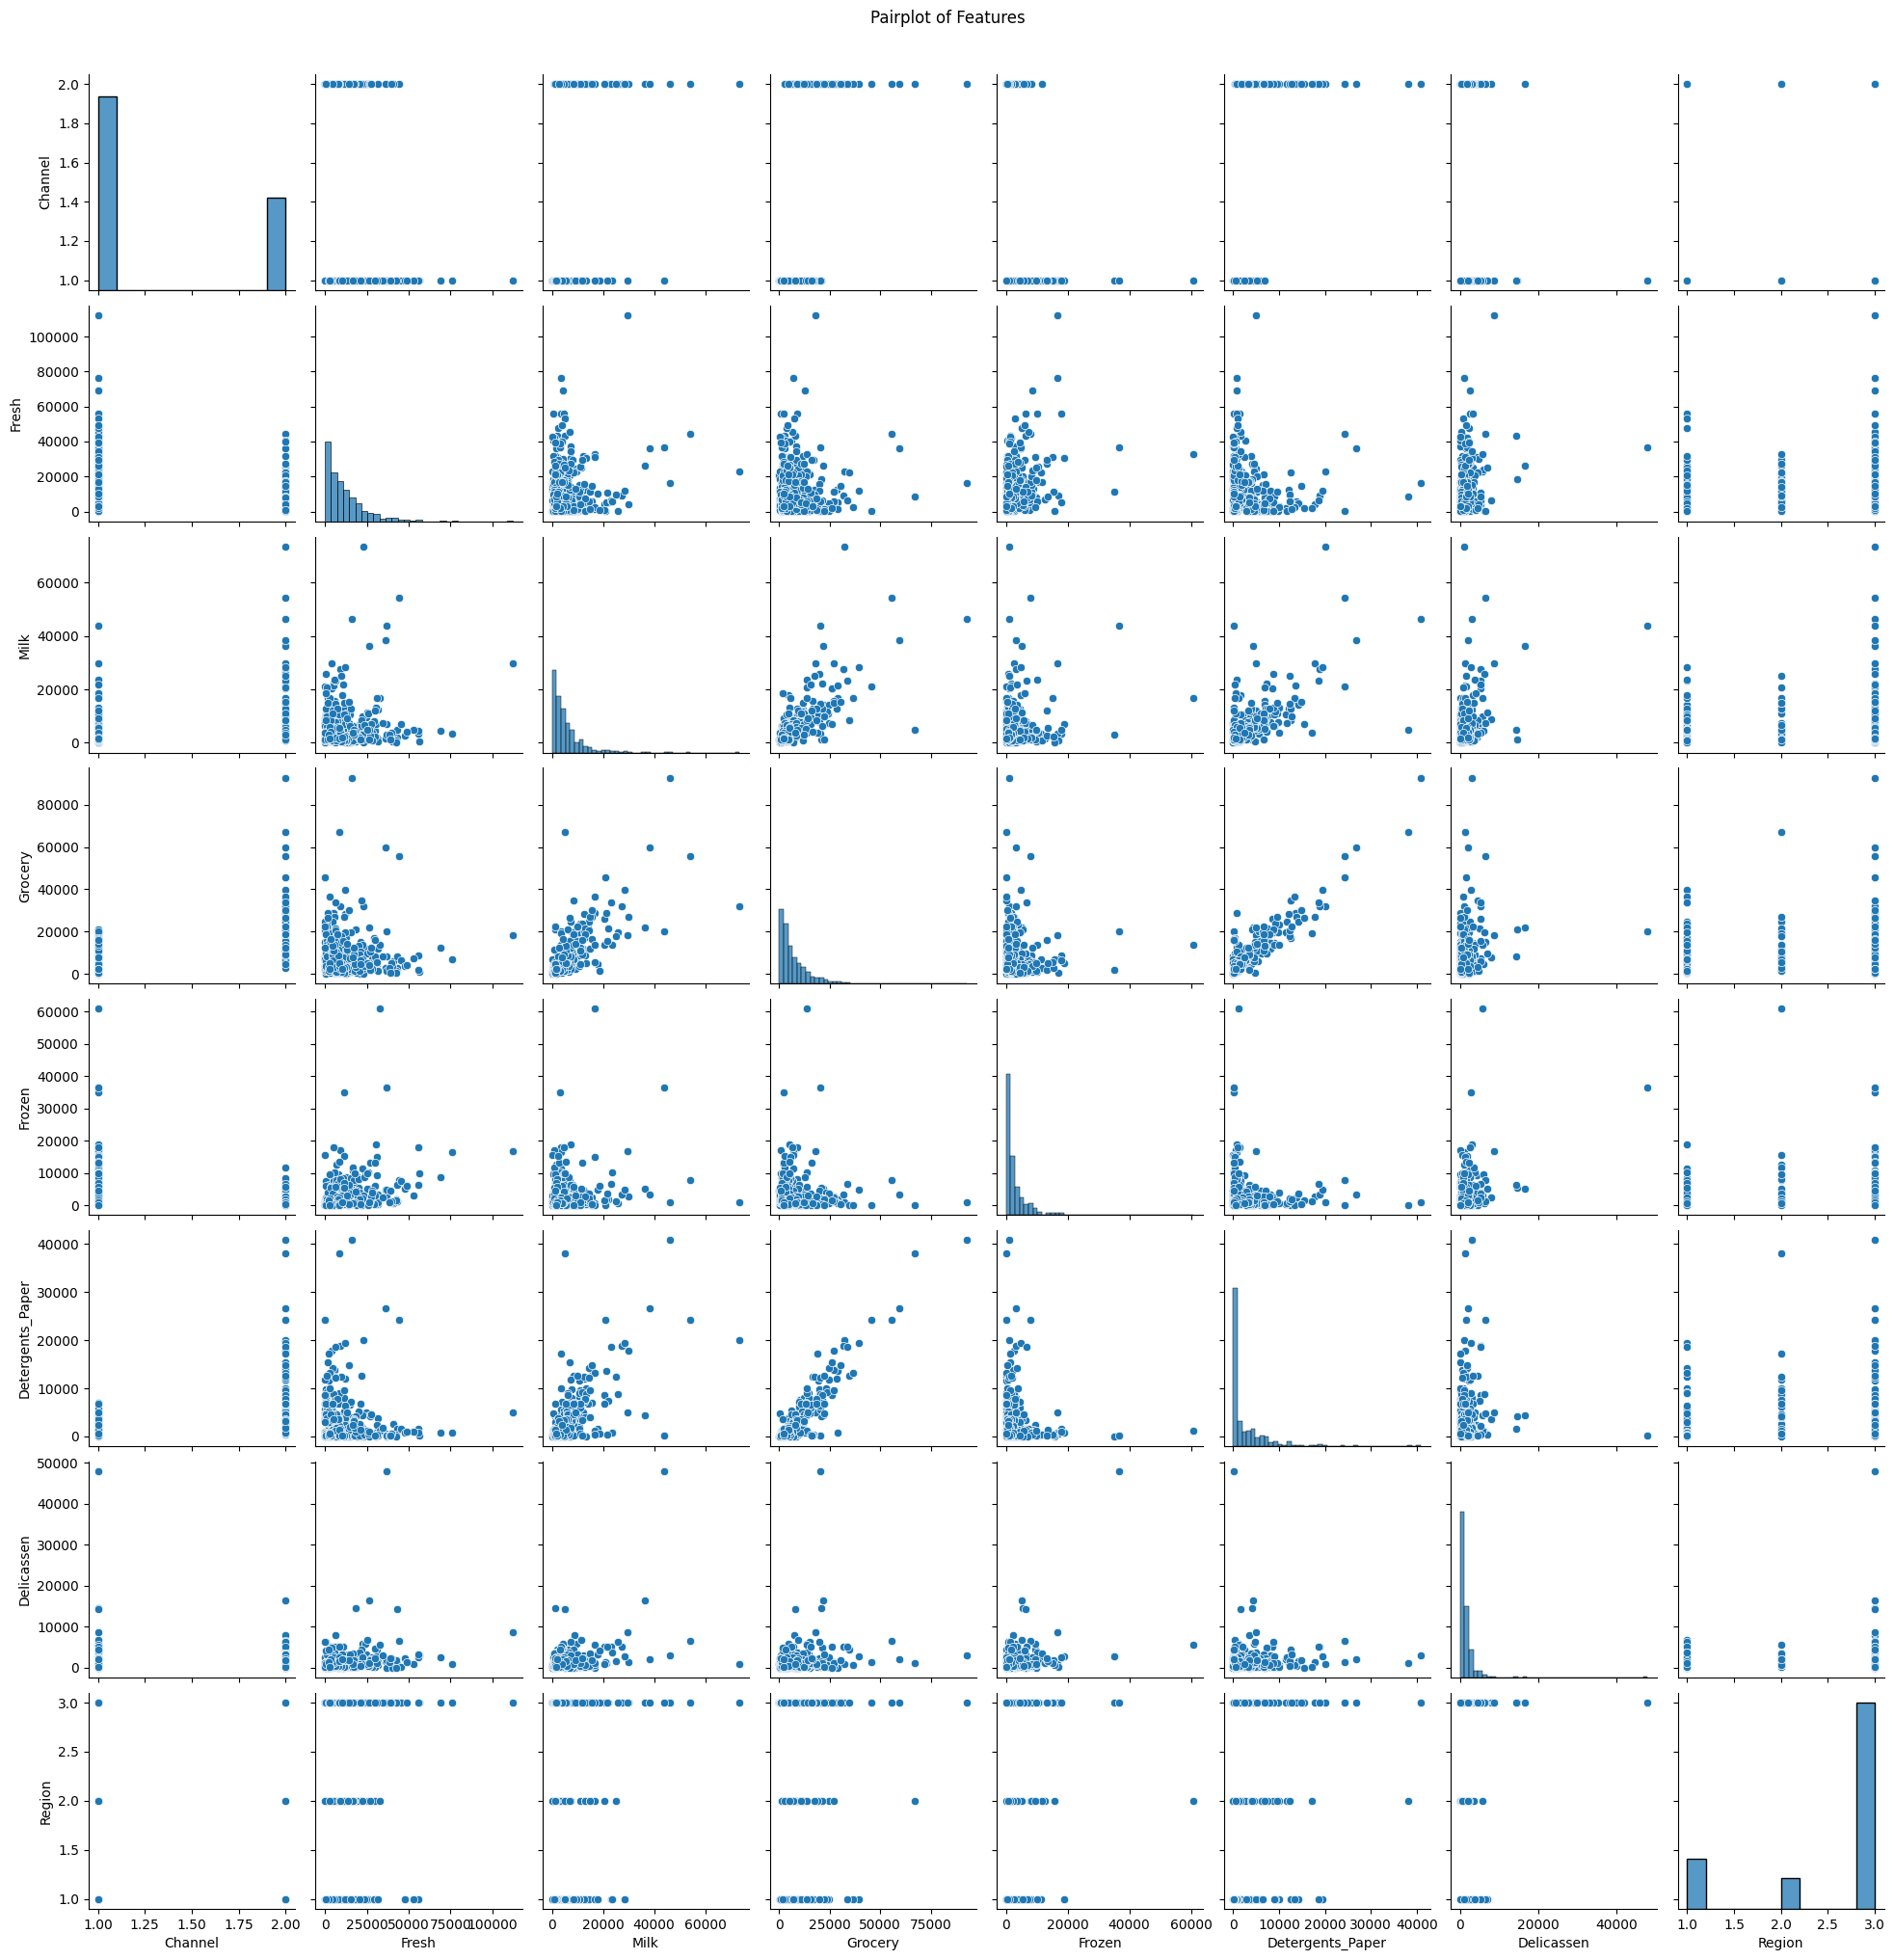

In [ ]:
# Plot pairplot to visualize relationships between features
sns.pairplot(data)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

## CORRELATION HEATMAP

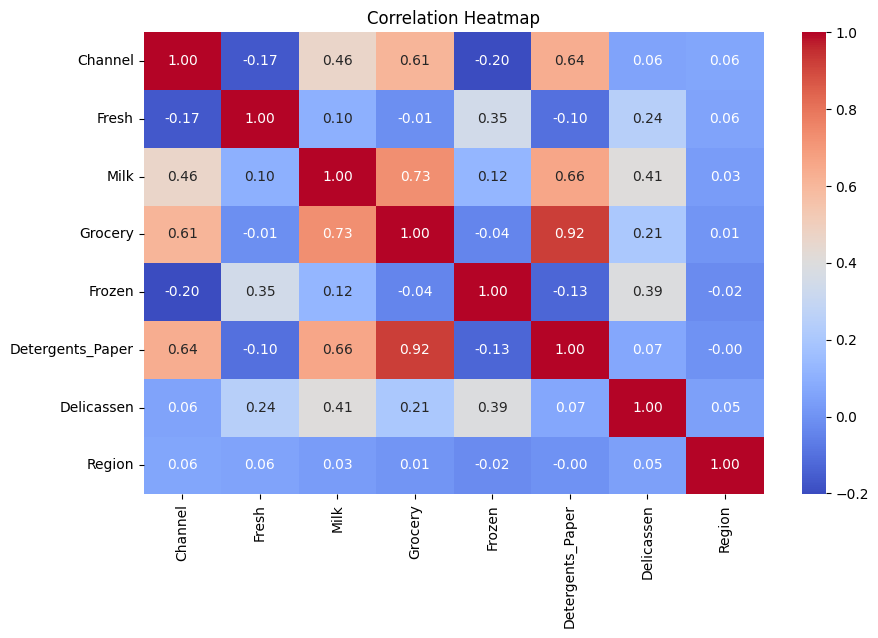

In [ ]:
# Plot heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## SHOW FEATURE DISTRIBUTIONS

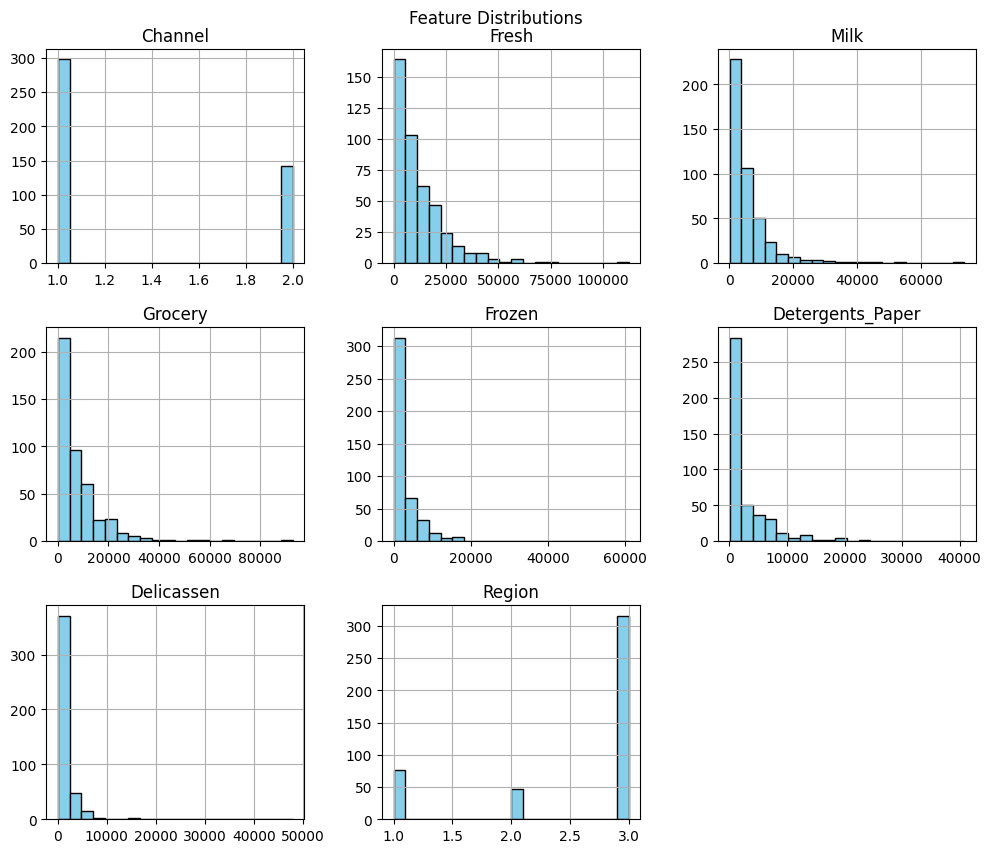

In [ ]:
# Plot distribution of each feature
data.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", y=0.92)
plt.show()

### Analyzing the variable more closely (Feature: Fresh)

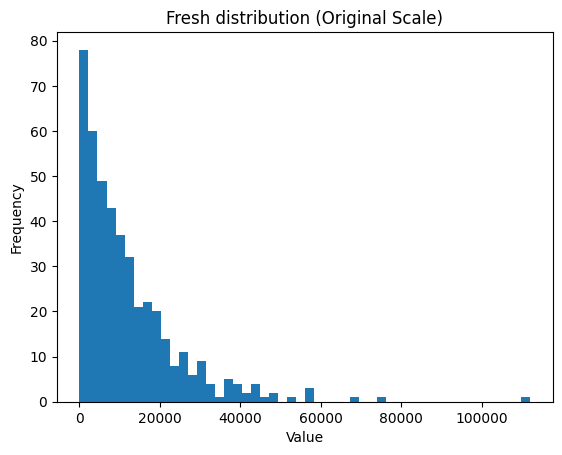

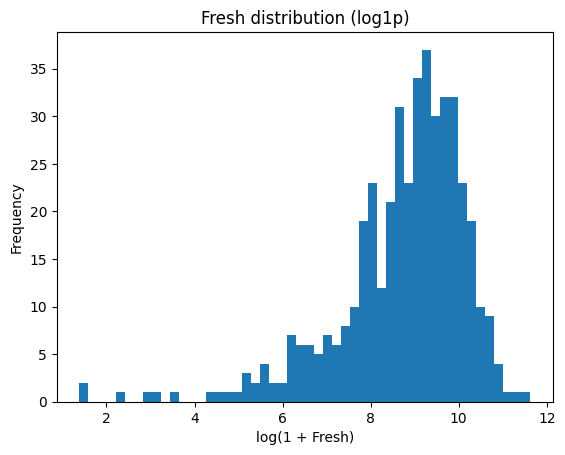

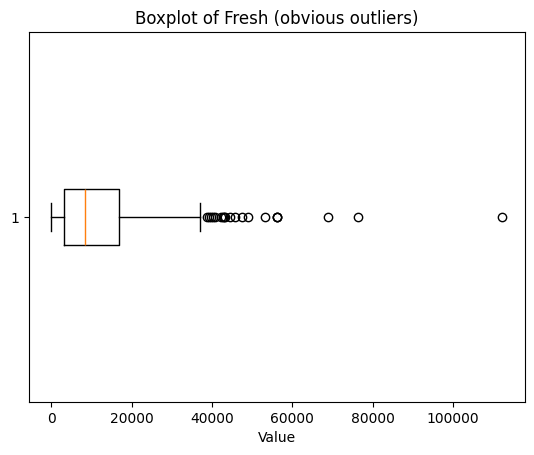

NameError: name 'calculate_boxplot_stats' is not defined

In [ ]:
# ---------- 1. Histogram (original scale) ----------
plt.figure()
plt.hist(data["Fresh"], bins=50)
plt.title("Fresh distribution (Original Scale)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# ---------- 2. Histogram (log scale) ----------
plt.figure()
plt.hist(np.log1p(data["Fresh"]), bins=50)
plt.title("Fresh distribution (log1p)")
plt.xlabel("log(1 + Fresh)")
plt.ylabel("Frequency")
plt.show()

# ---------- 3. Boxplot (original scale) ----------
plt.figure()
plt.boxplot(data["Fresh"], vert=False)
plt.title("Boxplot of Fresh (obvious outliers)")
plt.xlabel("Value")
plt.show()

fresh_stats = calculate_boxplot_stats(data, "Fresh")
fresh_stats


Result: Extremely asymmetric distribution"

👉 In simple terms:

- Many small values
- Few giant values
- Long right-skewed / heavy-tailed

This breaks assumptions of several models (e.g., K-Means without scaling).